# SWESARR Tutorial

![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg)

<div>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2021/06/swesarr.png" width="1589"/>
</div>

<div class="alert alert-block alert-info">
<b>Objectives:</b> 
    This is a 30-minute tutorial where we will ...
     <ol>
         <li> Introduce SWESARR </li>
         <li> Briefly introduce active and passive microwave remote sensing </li>
         <li> Learn how to access, filter, and visualize SWESARR data </li>
    </ol> 
</div>

## Quick References

<OL>
<LI> <A HREF="https://glihtdata.gsfc.nasa.gov/files/radar/SWESARR/prerelease/">SWESARR SAR Data Pre-release FTP Server</A>    
<LI> <A HREF="https://nsidc.org/data/SNEX20_SWESARR_TB/versions/1"> SWESARR Radiometer Data, SnowEx20, v1</A>
<LI> <A HREF="https://nsidc.org/data">NSIDC Datasets</A>
<LI> <A HREF="https://blogs.nasa.gov/swesarr/">SWESARR Blogspot</A>
<LI> <A HREF="https://github.com/db1950/swesarr-tut">A Version of This Repo That Doesn't Require Access to Amazon Servers </A>
</OL>

## What is SWESARR?
<UL>
<LI>  <a href="https://www.youtube.com/watch?v=5hVQusosGSg&t=210s">Description from Batuhan Osmanoglu.</a> 
<LI> Airborne sensor system measuring active and passive microwave measurements
<LI> Colocated measurements are taken simultaneously using an ultra-wideband antenna
</UL>
<P>
SWESARR gives us insights on the different ways active and passive signals are influenced by snow over large areas.

## Active and Passive? Microwave Remote Sensing?


### Passive Systems

* All materials can naturally emit electromagnetic waves
* What is the cause?

<div>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2021/06/particles.png" width="360"/>
</div>
<br><br>

* Material above zero Kelvin will display some vibration or movement of particles
* These moving, charged particles will induce electromagnetic waves
* If we're careful, we can measure these waves with a radio wave measuring tool, or "radiometer"
<br>

<div>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2021/06/radiometer.png" width="500"/>
</div>


* Radiometers see emissions from many sources, but they're usually very weak
* It's important to design a radiometer that (1) minimizes side lobes and (2) allows for averaging over the main beam
* For this reason, radiometers often have low spatial resolution

**✏️  Radiometers allow us to study earth materials through incoherent averaging of naturally emitted signals**

### Active Systems
* While radiometers generally measure natural electromagnetic waves, radars measure man-made electromagnetic waves
* Transmit your own wave, and listen for the returns
* The return of this signal is dependent on the surface and volume characteristics of the material it contacts

<div>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2021/06/radar.png" width="500"/>
</div>

**✏️  Synthetic aperture radar allows for high spatial resolution through processing of coherent signals**

In [1]:
%%HTML
<style>
td { font-size: 15px }
th { font-size: 15px }
</style>

## SWESARR Sensors
<center>
<h1><font size="+1">SWESARR Frequencies, Polarization, and Bandwidth Specification  </font></h1>
</center>

| Center-Frequency (GHz) | Band       |  Sensor      | Bandwidth (MHz) | Polarization |
| ---------------------- | ---------- | ------------ | --------------- | ------------ |
| 9.65                   |  X         |  SAR         | 200             | VH and VV    |
| 10.65                  |  X         |  Radiometer  | 200             | H            |
| 13.6                   | Ku         |  SAR         | 200             | VH and VV    |
| 17.25                  | Ku         |  SAR         | 200             | VH and VV    |
| 18.7                   |  K         |  Radiometer  | 200             | H            |
| 36.5                   | Ka         |  Radiometer  | 1,000           | H            |

<br>
<center>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/wppa/1.jpg", width="400", title="Plane" /> <br>
    <img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/wppa/4.jpg", width="400", title="Instrument" />
</center>


## SWESARR Coverage



* Below: radiometer coverage for all passes made between February 10 to February 12, 2020
* SWESARR flights cover many snowpit locations over the Grand Mesa area as shown by the dots in blue

<div>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2021/06/passes.png", width="500", title="SWESARR passes over Grand Mesa in 2020" />
</div>

## Reading SWESARR Data

- SWESARR's SAR data is organized with a common file naming convention for finding the time, location, and type of data
- [Lets look at the prerelease data on its homepage](https://glihtdata.gsfc.nasa.gov/files/radar/SWESARR/prerelease/)
<div>
<img src="https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2020/09/SWESARR-Naming-Convention_recolor_v2.png" width="1000"/>
</div>

***
<br><br>

<CENTER>
<H1 style="color:red">
Accessing Data: SAR
</H1>
</CENTER>

### SAR Data Example

In [2]:
!pip install snowexsql

In [3]:
# Import several libraries. 
# comments to the right could be useful for local installation on Windows.

from shapely import speedups      # https://www.lfd.uci.edu/~gohlke/pythonlibs/
#speedups.disable()                # <-- handle a potential error in cartopy

import requests                   # !conda install -c anaconda requests 

# raster manipulation libraries
import rasterio                   # https://www.lfd.uci.edu/~gohlke/pythonlibs/
from osgeo import gdal            # https://www.lfd.uci.edu/~gohlke/pythonlibs/
import cartopy.crs as ccrs        # https://www.lfd.uci.edu/~gohlke/pythonlibs/
import rioxarray as rxr           # !conda install -c conda-forge rioxarray
import xarray as xr               # !conda install -c conda-forge xarray dask netCDF4 bottleneck

# SnowEx Pit Data!
from snowexsql.api import LayerMeasurements # pip install snowexsql

# plotting tools
from matplotlib import pyplot     # !conda install matplotlib
import datashader as ds           # https://www.lfd.uci.edu/~gohlke/pythonlibs/
import hvplot.xarray              # !conda install hvplot
import hvplot.pandas
import holoviews as hv

# append the subfolders of the current working directory to pythons path
import os, sys, glob

swesarr_subdirs = ["data", "util"]
tmp = [sys.path.append(os.getcwd() + "/" + sd) for sd in swesarr_subdirs]
del tmp # suppress Jupyter notebook output, delete variable

# lambda functions!
to_nl = lambda a: 10**(a/10)
to_db = lambda a: 10*np.log10(a)

# settings to make matplotlib look nicer!
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 4.5) # (w, h)

#############################################
# Suppress Warnings for Cleaner Output      #
# (Address Warnings in future update)       #
import warnings                             #
warnings.filterwarnings('ignore')           #
#############################################

from helper import gdal_corners, join_files, join_sar_radiom, filt_pit_to_sar, filt_radiom_points, sar_swe_plot, radiom_swe_plot, rough_radiom_area

#### Select your data

In [4]:
# select files to download

# SWESARR data website
source_repo = 'https://glihtdata.gsfc.nasa.gov/files/radar/SWESARR/prerelease/'

# Example flight line
flight_line = 'GRMCT2_31801_20007_016_200211_225_XX_01/'

# SAR files within this folder
data_files = [
    'GRMCT2_31801_20007_016_200211_09225VV_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_09225VH_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_13225VV_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_13225VH_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_17225VV_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_17225VH_XX_01.tif'
]

# store the location of the SAR tiles as they're located on the SWESARR data server
remote_tiles = [source_repo + flight_line + d for d in data_files]

# create local output data directory
output_dir = os.getcwd() + '/data/'
try:
    os.makedirs(output_dir)
except FileExistsError:
    print('output directory prepared!')

# store individual TIF files locally on our computer / server
output_paths = [output_dir + d for d in data_files]

output directory prepared!


#### Download SAR data and place into data folder

In [5]:
##    for each file selected, store the data locally 
##
##    only run this block if you want to store data on the current 
##    server/hard drive this notebook is located.
##
################################################################

# Search data directory for all tifs
cur_tifs = glob.glob('./data/*.tif', recursive=True)

if not cur_tifs:
    for remote_tile, output_path in zip(remote_tiles, output_paths):
        
        # download data
        r = requests.get(remote_tile)
    
        # Store data (~= 65 MB/file)
        if r.status_code == 200:
            with open(output_path, 'wb') as f:
                f.write(r.content)

#### Merge SAR datasets into single xarray file

In [6]:
sar_data = join_files(output_paths)
sar_data

<xarray.DataArray (band: 6, y: 4289, x: 3959)> Size: 408MB
dask.array<concatenate, shape=(6, 4289, 3959), dtype=float32, chunksize=(1, 1200, 1200), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 32kB 7.396e+05 7.396e+05 ... 7.475e+05 7.475e+05
  * y            (y) float64 34kB 4.329e+06 4.329e+06 ... 4.32e+06 4.32e+06
    spatial_ref  int64 8B 0
  * band         (band) <U4 96B '09VV' '09VH' '13VV' '13VH' '17VV' '17VH'
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     nan
    scale_factor:   1.0
    add_offset:     0.0

#### Get SnowEx Snow Pit Data

In [7]:
snow_pits = LayerMeasurements.from_filter(type="density",
                                   site_name="Grand Mesa",
                                   date_greater_equal="2020-02-01",
                                   date_less_equal="2020-02-15",
                                   limit=2000)

1.) Find SnowPits within SWESARR swath <br>
2.) Obtain mean SWESARR backscatter in a square about each snowpit

In [8]:
square_length = 3 # [meters]
[point_swe_filt, swesarr_mean] = filt_pit_to_sar(snow_pits, sar_data, square_length)

#### Plot data with hvplot

In [ ]:
# Set clim directly:
clim=(-20,20)
cmap='gray'
crs = ccrs.UTM(zone='12') #12n
tiles='OSM'
tiles='EsriImagery'
transparent_tile = hv.Tiles('https://server.arcgisonline.com/ArcGIS/rest/services/Reference/World_Reference_Overlay/MapServer/tile/{Z}/{Y}/{X}', name="EsriReference").opts(alpha=0.0)
frame_width  = 600
frame_height = 500

# create an image for SAR data!
sar_img = sar_data.hvplot.image(x='x',y='y',groupby='band',cmap=cmap,clim=clim,rasterize=True,
                       xlabel='Longitude',ylabel='Latitude',
                       frame_height=frame_height, frame_width=frame_width,
                       xformatter='%.1f',yformatter='%.1f', crs=crs, tiles=tiles, alpha=0.8)

# create an image for snow pit data!
pit_img = point_swe_filt.hvplot.points('lon', 'lat',  geo=True, color='swe', alpha=0.8,
                        tiles=transparent_tile, frame_height=frame_height, frame_width=frame_width, crs=crs, hover_cols=['site_id'],
                        cmap='Reds')

# overlay both images!
total_img = sar_img * pit_img  # <- overlay images

# display the plot!
total_img

#### Optional: Plot snowpit SWE against averaged SWESARR data

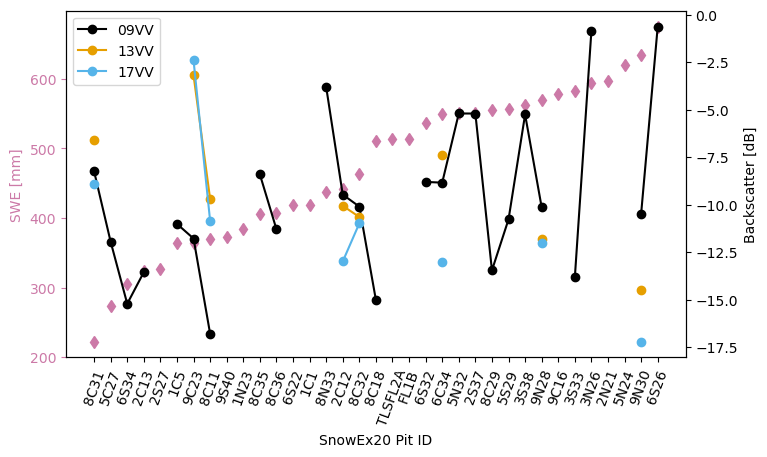

In [10]:
sar_swe_fig = sar_swe_plot(point_swe_filt, swesarr_mean)

**🎉  Congratulations! You now know how to download and display a SWESARR SAR dataset !**

### Radiometer Data Example
* SWESARR's radiometer data is publicly available at NSIDC
    * Will be available on [SnowExSQL if the fans demand it!](https://github.com/SnowEx/snowexsql/search?q=swesarr)
* [Radiometer Data v1 Available Here](https://nsidc.org/data/SNEX20_SWESARR_TB/versions/1)

In [11]:
import pandas as pd      # !conda install pandas
import numpy as np       # !conda install numpy
import xarray as xr      # !conda install -c anaconda xarray 

import hvplot            # !conda install hvplot
import hvplot.pandas
import holoviews as hv   # !conda install -c conda-forge holoviews 
from holoviews.operation.datashader import datashade
#from geopy.distance import distance     #!conda install -c conda-forge geopy 

#### Downloading SWESARR Radiometer Data with `wget`

* If you are running this on the SnowEx Hackweek server, `wget` should be configured.
* If you are using this tutorial on your local machine, you'll need `wget`.
    * Linux Users
        - You should be fine. This is likely baked into your operating systems. Congratulations! You chose correctly.
    * Apple Users
        - The author of this textbox has never used a Mac. There are many command-line suggestions online. `sudo brew install wget`, `sudo port install wget`, etc. Try searching online!
    * Windows Users
        - [Check out this tutorial, page 2](https://blogs.nasa.gov/swesarr/wp-content/uploads/sites/305/2020/10/how_to_download_SWESARR_radar_data.pdf) You'll need to download binaries for `wget`, and you should really make it an environment variable!
        
Be sure to be diligent before installing anything to your computer.
        
Regardless, fill in your NASA Earthdata Login credentials and follow along!

In [12]:
# !wget --user=USERNAME_HERE --password=PASSWORD_HERE --quiet https://n5eil01u.ecs.nsidc.org/SNOWEX/SNEX20_SWESARR_TB.001/2020.02.12/SNEX20_SWESARR_TB_GRMCT2_13801_20007_000_200211_XKKa225H_v01.csv -O {output_dir}SNEX20_SWESARR_TB_GRMCT2_13801_20007_000_200211_XKKa225H_v01.csv

In [13]:
# !wget --quiet https://n5eil01u.ecs.nsidc.org/SNOWEX/SNEX20_SWESARR_TB.001/2020.02.12/SNEX20_SWESARR_TB_GRMCT2_13801_20007_000_200211_XKKa225H_v01.csv -O {output_dir}SNEX20_SWESARR_TB_GRMCT2_13801_20007_000_200211_XKKa225H_v01.csv

#### Select an example radiometer data file

In [14]:
# use the file we downloaded with wget above
excel_path = f'{output_dir}SNEX20_SWESARR_TB_GRMCT2_13801_20007_000_200211_XKKa225H_v01.csv'

# read data
radiom = pd.read_csv(excel_path)

#### Lets examine the radiometer data files content

In [15]:
radiom.head()
#radiom.hvplot.table(width=1100) # sortable table in jupyterlab

,UTC,Longitude (deg),Latitude (deg),Elevation (m),TB X (K),TB K (K),TB Ka (K),Antenna Longitude (deg),Antenna Latitude (deg),Antenna Altitude (m),Antenna Yaw (deg),Antenna Pitch (deg),Antenna Look Angle (deg)
0,20200211-18:33:53.048360,-108.227372,39.071994,2971,247.1,241.2,231.2,-108.052329,38.940324,4525.7,2.02,3.53,44.9
1,20200211-18:33:53.148380,-108.227372,39.071901,2979,246.3,238.2,229.3,-108.052331,38.940326,4525.7,2.04,3.53,44.9
2,20200211-18:33:53.248380,-108.227372,39.071809,2979,247.8,237.5,227.4,-108.052334,38.940329,4525.7,2.06,3.53,44.9
3,20200211-18:33:53.348380,-108.227279,39.071716,2991,247.2,237.5,225.4,-108.052336,38.940331,4525.7,2.05,3.53,44.9
4,20200211-18:33:53.448380,-108.227279,39.071716,2991,245.7,237.4,222.6,-108.052339,38.940333,4525.6,2.05,3.53,44.9


#### Plot radiometer data with hvplot

In [16]:
# create several series from pandas dataframe
lon_ser = pd.Series( radiom['Longitude (deg)'].to_list() * (3) )
lat_ser = pd.Series( radiom['Latitude (deg)'].to_list()  * (3) )
clim_r=(200,270)

tb_ser = pd.Series(
    radiom['TB X (K)'].to_list() + 
    radiom['TB K (K)'].to_list() + 
    radiom['TB Ka (K)'].to_list(), name="Tb"
     )

# get series length, create IDs for plotting
sl = len(radiom['TB X (K)'])
id_ser = pd.Series(
    ['X-band']*sl + ['K-band']*sl + ['Ka-band']*sl, name="ID"
     )

frame = {'Longitude (deg)' : lon_ser, 'Latitude (deg)' : lat_ser,
         'TB' : tb_ser, 'ID' : id_ser}
radiom_p = pd.DataFrame(frame)

del sl, lon_ser, lat_ser, tb_ser, id_ser, frame

radiom_p.hvplot.points('Longitude (deg)', 'Latitude (deg)', groupby='ID', geo=True, color='TB', alpha=1,
                        tiles='EsriImagery', height=500, width=800, clim=clim_r)

:DynamicMap   [ID]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude (deg),Latitude (deg)]   (TB)

**🎉 Congratulations! You now know how to download and display a SWESARR radiometer dataset !**

#### SWE and Radiometer Data
First, filter the values far away from the radiometer and merge into a single dataset

In [17]:
fp_10m, fp_18m, fp_37m = 496, 282, 144 # maximum field of view for each channel 
rad_swe = filt_radiom_points( fp_10m, fp_18m, fp_37m, radiom, point_swe_filt )

#### Optional: Rough Impression of the Radiometer Footprint Size

In [18]:
out_img = rough_radiom_area(radiom, rad_swe, fp_10m, fp_18m, fp_37m)
# Uncomment below to visualize image!
# out_img

Lets repeat our comparison of snowpits to SWESARR values for the radiometer!

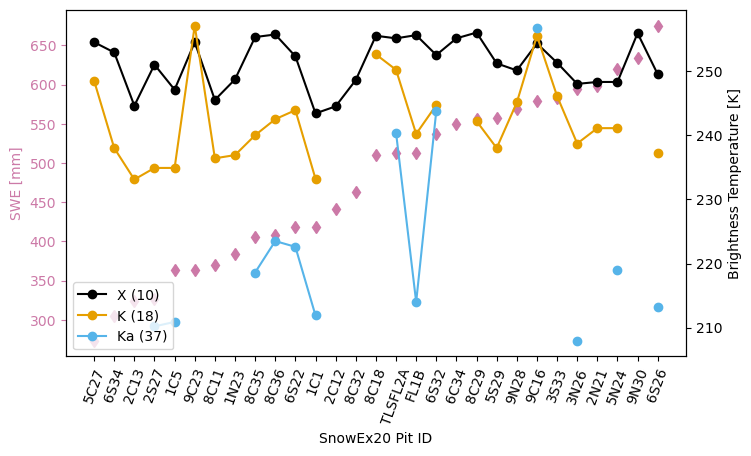

In [19]:
rad_fig = radiom_swe_plot(rad_swe)

## SAR and Radiometer Together

* The novelty of SWESARR lies in its colocated SAR and radiometer systems
* Lets try filtering the SAR dataset and plotting both datasets together
* For this session, I've made the code a function. We can look at it together by opening `.util/helper.py`

In [20]:
# data_p, data_ser = join_sar_radiom(sar_data, radiom)

# data_p.hvplot.points('Longitude (deg)', 'Latitude (deg)', groupby='ID', geo=True, color='Measurements', alpha=1,
                        # tiles='ESRI', height=400, width=500)

## Exercise

<div class="alert alert-block alert-info">
<b>Exercise:</b> 
     <ol>
         <li>Plot a time-series visualization of the filtered SAR channels from the output of the 
             <font face="Courier New" > join_sar_radiom()</font> function
         </li>
         <li>Plot a time-series visualization of the radiometer channels from the output of the 
             <font face="Courier New" > join_sar_radiom()</font> function 
         </li>
         <li>Hint: the data series variable (<font face="Courier New" > data_ser </font>) is a pandas data series. 
             Use some of the methods shown above to read and plot the data!
         </li>
    </ol> 
</div>

In [21]:

### Your Code Here #############################################################################################################
#
# Two of Many Options:
# 1.) Go the matplotlib route
#     a.) Further reading below:
#         https://matplotlib.org/stable/tutorials/introductory/pyplot.html
#
# 2.) Try using hvplot tools if you like
#      a.) Further reading below:
#          https://hvplot.holoviz.org/user_guide/Plotting.html
#
# Remember, if you don't use a library all of the time, you'll end up <search engine of your choice>-ing it. Go crazy!
#
################################################################################################################################

# configure some inline parameters to make things pretty / readable if you'd like to go with matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

<br><br><br>
## [Warnings]
<div class="alert alert-block alert-danger">
<b>Interpreting Data:</b> After the 2019 and 2020 measurement periods for SWESARR, an internal timing error was found in the flight data which affects the spatial precision of the measurements. While we are working to correct this geospatial error, please consider this offset before drawing conclusions from SWESARR data if you are using a dataset prior to this correction. The SWESARR website will announce the update of the geospatially corrected dataset.
</div>
